# DETROIT CRIME ANALYSIS
##### This project focuses on developing a **time-series forecasting** system to optimize public safety strategies and resource allocation. By building an **end-to-end data pipeline**, the project aggregates and **geocodes** large-scale crime incident reports to identify **spatial-temporal patterns**.

##### The core technical effort involves **training and benchmarking statistical models (SARIMA, Prophet)** against advanced **deep learning architectures (LSTM, BLSTM)** to determine the most accurate predictors of criminal activity. These models are utilized to generate long-term forecasts, specifically pinpointing high-risk districts. The final output transforms raw data into actionable intelligence, enabling data-driven decisions for effective police deployment and crime prevention.

---

## PART 1 - Data Acquisition & Initial Exploration

##### The Datasets are downloaded from [Detroit Open Data Portal](https://data.detroitmi.gov/datasets "Detroit Open Data Portal").
##### 1. This initial phase focused on architecting a data ingestion to support downstream predictive modeling. The objective was to synthesize heterogeneous datasets to investigate the relationship between public safety and licensed establishments.
##### 2. Extraction of [RMS Crime Incidents](https://data.detroitmi.gov/datasets/detroitmi::rms-crime-incidents/explore?location=42.347872%2C-83.095882%2C10.53) from the Detroit Open Data API (2016–Present) and State of Michigan [Liquor License records](https://data.detroitmi.gov/datasets/detroitmi::liquor-licenses-current/explore?location=42.302893%2C-83.018479%2C10.20).
##### 3. To ensure analytical reliability, conducted a rigorous Exploratory Data Analysis (EDA) and data quality assessment. Leveraging pandas for manipulation and matplotlib for visualization, generated comprehensive data quality reports. These audits—ranging from missing value trends over time to temporal coverage timelines—established a verified, clean baseline for the project, eliminating data inconsistencies prior to the modeling stage.

##### importing the data

In [32]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

crime_incidents = pd.read_csv('data/rms_crime_incidents.csv')
crime_incidents.head(50)

,X,Y,incident_entry_id,nearest_intersection,offense_category,offense_description,state_offense_code,arrest_charge,charge_description,incident_occurred_at,...,report_number,scout_car_area,police_precinct,census_block_2020_geoid,neighborhood,council_district,zip_code,longitude,latitude,ESRI_OID
0,-83.063429,42.438083,1353441-2900,E Lantz St & Ryan Rd,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY ...,2900,29000,DAMAGE TO PROPERTY ...,2025/10/23 20:00:00+00,...,2510230243,1103,11,2.616351e+14,Farwell,3.0,48234.0,-83.063429,42.438083,1
1,-83.142083,42.330868,775415-2601,Ternes & Elmer St,FRAUD,FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE ...,2601,26001,FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE ...,2022/02/07 23:00:00+00,...,2202100094,0408,04,2.616353e+14,Claytown,6.0,48210.0,-83.142083,42.330868,2
2,-83.110524,42.356219,930596-3072,W I 96 Service Drive & W Grand Blvd,FRAUD,RETAIL FRAUD - THEFT,3002,30002,RETAIL FRAUD - THEFT,2023/02/25 01:00:00+00,...,2302240305,1006,10,2.616353e+14,Petoskey-Otsego,6.0,48204.0,-83.110524,42.356219,3
3,-83.203400,42.367762,1353454-2900,Orangelawn St & Mansfield St,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY ...,2900,29000,DAMAGE TO PROPERTY ...,2025/10/23 22:09:00+00,...,2510230288,0608,06,2.616355e+14,Joy Community,7.0,48227.0,-83.203400,42.367762,4
4,-83.102050,42.423941,640474-1301,John R St & E Montana St,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2021/03/05 01:29:00+00,...,2103050008,1205,12,2.616351e+14,Grixdale Farms,3.0,48203.0,-83.102050,42.423941,5
5,-83.246562,42.440197,1046846-2307,Trojan St & Braile St,LARCENY,LARCENY - OTHER,2307,23007,LARCENY - OTHER,2023/11/10 02:30:00+00,...,2311090406,0802,08,2.616354e+14,Evergreen Lahser 7/8,1.0,48219.0,-83.246562,42.440197,6
6,-83.006752,42.389974,1482-2201,McClellan St & Felch St,BURGLARY,BURGLARY - FORCED ENTRY,2201,22001,BURGLARY - FORCED ENTRY,2016/12/10 20:00:00+00,...,1612130093,0705,07,2.616351e+14,West End,4.0,48213.0,-83.006752,42.389974,7
7,-83.233826,42.436931,2638-2401,Pembroke Ave & Huntington Rd,STOLEN VEHICLE,MOTOR VEHICLE THEFT,2401,24001,MOTOR VEHICLE THEFT,2016/12/13 02:00:00+00,...,1612130056,0803,08,2.616354e+14,O'Hair Park,1.0,48219.0,-83.233826,42.436931,8
8,-83.030719,42.443539,1469-2603,Carrie St & Milbank St,FRAUD,FRAUD - IMPERSONATION,2603,26003,FRAUD - IMPERSONATION,2016/11/07 20:30:00+00,...,1612130055,1104,11,2.616351e+14,Sherwood,3.0,48234.0,-83.030719,42.443539,9
9,-83.222733,42.366019,640466-2303,Bourbon St & Greenview Ave,LARCENY,LARCENY - THEFT FROM BUILDING,2303,23003,LARCENY - THEFT FROM BUILDING,2021/03/04 16:00:00+00,...,2103050022,0607,06,2.616355e+14,Franklin Park,7.0,48228.0,-83.222733,42.366019,10


##### Checking for Null Values

In [33]:
pd.isnull(crime_incidents).sum()

X                            956
Y                            956
incident_entry_id              0
nearest_intersection         956
offense_category               0
offense_description            0
state_offense_code             0
arrest_charge                  0
charge_description             0
incident_occurred_at           0
incident_time                  0
incident_day_of_week           0
incident_hour_of_day           0
incident_year                  0
case_id                        0
case_status                    0
case_status_updated_at         7
updated_in_ibr_at          72789
updated_at                    24
crime_id                       0
report_number                  0
scout_car_area                 0
police_precinct                0
census_block_2020_geoid     2962
neighborhood                6583
council_district            7664
zip_code                    6670
longitude                    956
latitude                     956
ESRI_OID                       0
dtype: int

##### percentage of null values for all columns

In [34]:
total_rows = len(crime_incidents)
percentage_missing_values = (crime_incidents.isnull().sum() / total_rows) * 100

print("Percentage of Null Values per Column:")
print(percentage_missing_values)

Percentage of Null Values per Column:
X                          0.127356
Y                          0.127356
incident_entry_id          0.000000
nearest_intersection       0.127356
offense_category           0.000000
offense_description        0.000000
state_offense_code         0.000000
arrest_charge              0.000000
charge_description         0.000000
incident_occurred_at       0.000000
incident_time              0.000000
incident_day_of_week       0.000000
incident_hour_of_day       0.000000
incident_year              0.000000
case_id                    0.000000
case_status                0.000000
case_status_updated_at     0.000933
updated_in_ibr_at          9.696796
updated_at                 0.003197
crime_id                   0.000000
report_number              0.000000
scout_car_area             0.000000
police_precinct            0.000000
census_block_2020_geoid    0.394591
neighborhood               0.876973
council_district           1.020982
zip_code                  

##### Initial Latitude and Longitude plotting

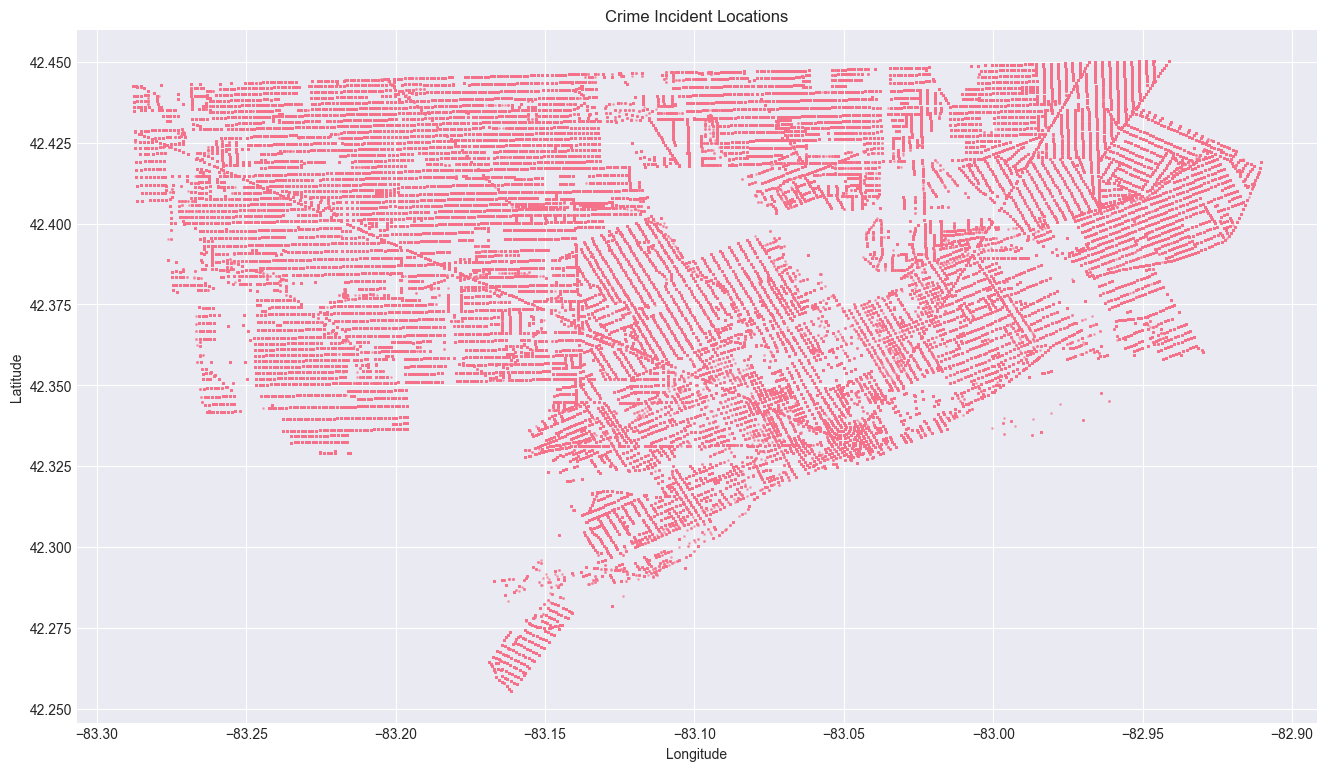

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.scatter(crime_incidents['longitude'], crime_incidents['latitude'], alpha=0.5, s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Incident Locations')
plt.grid(True)
plt.show()

##### Distribution checks for all the numerical columns

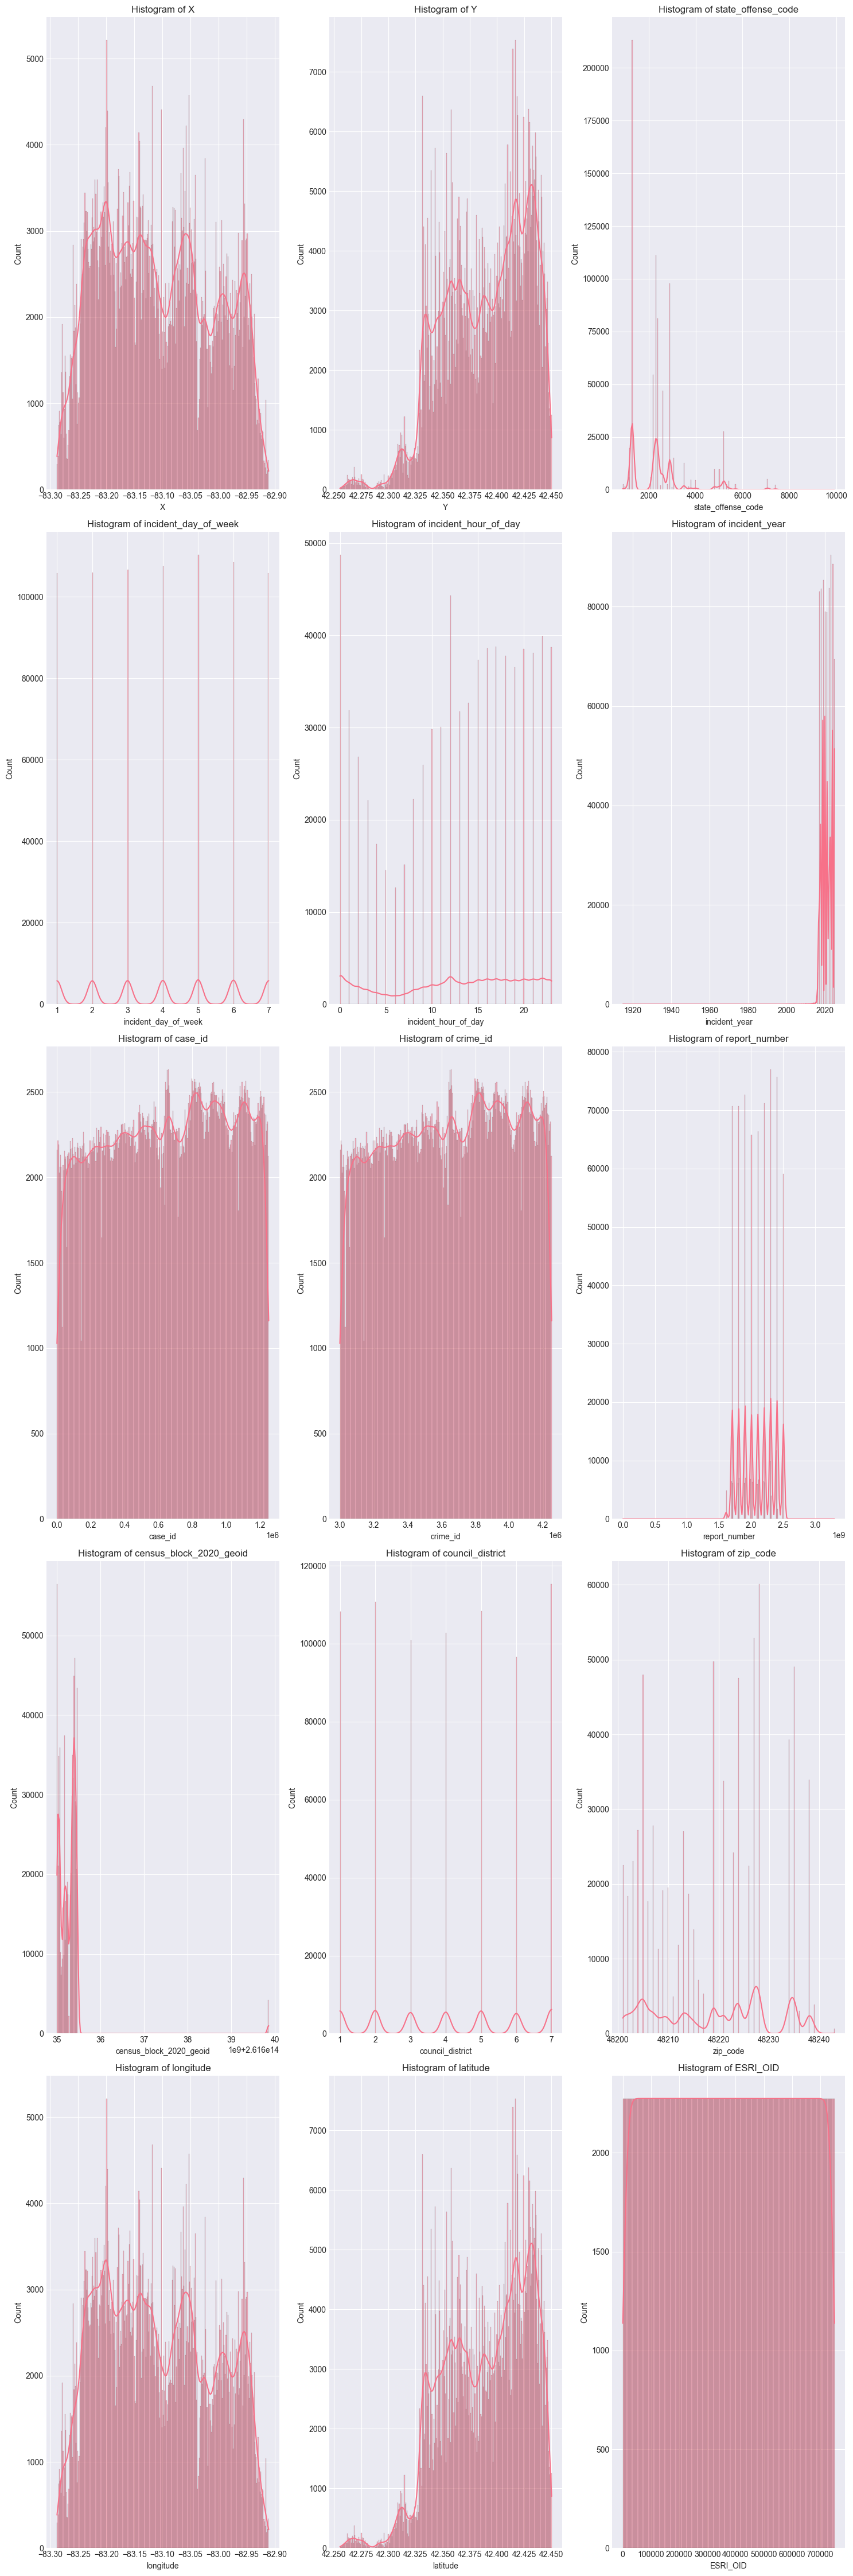

In [36]:
import seaborn as sns

numerical_cols = crime_incidents.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, len(numerical_cols) * 3))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.histplot(x=crime_incidents[col], kde=True, bins=330)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

##### Correlation Heatmap

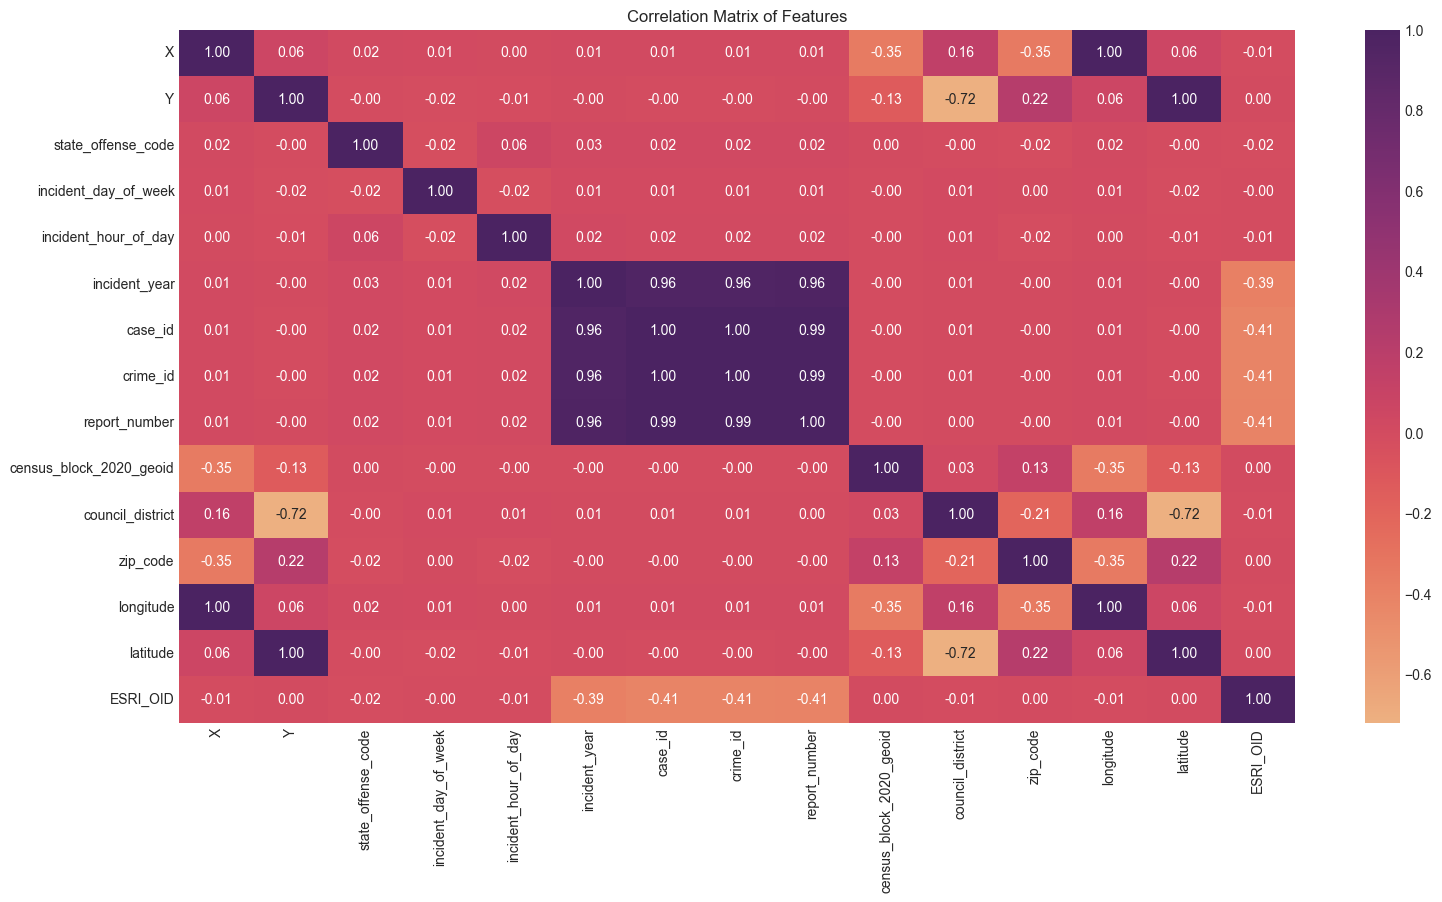

In [37]:
numerical_data = crime_incidents.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(18, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

##### Conversion of Datetime variable and setting it as Index

In [38]:
crime_incidents['incident_occurred_at'] = pd.to_datetime(crime_incidents['incident_occurred_at'])
crime_incidents = crime_incidents.set_index('incident_occurred_at')
crime_incidents.index

DatetimeIndex(['2025-10-23 20:00:00+00:00', '2022-02-07 23:00:00+00:00',
               '2023-02-25 01:00:00+00:00', '2025-10-23 22:09:00+00:00',
               '2021-03-05 01:29:00+00:00', '2023-11-10 02:30:00+00:00',
               '2016-12-10 20:00:00+00:00', '2016-12-13 02:00:00+00:00',
               '2016-11-07 20:30:00+00:00', '2021-03-04 16:00:00+00:00',
               ...
               '2024-04-01 03:00:00+00:00', '2022-05-08 18:00:00+00:00',
               '2024-07-10 16:22:00+00:00', '2021-10-21 09:58:00+00:00',
               '2024-08-03 23:38:00+00:00', '2024-03-30 16:00:00+00:00',
               '2024-07-16 14:21:00+00:00', '2021-07-28 10:00:00+00:00',
               '2021-09-30 23:04:00+00:00', '2023-09-06 16:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='incident_occurred_at', length=750650, freq=None)

##### Missing Value Counts for each variable over timeline

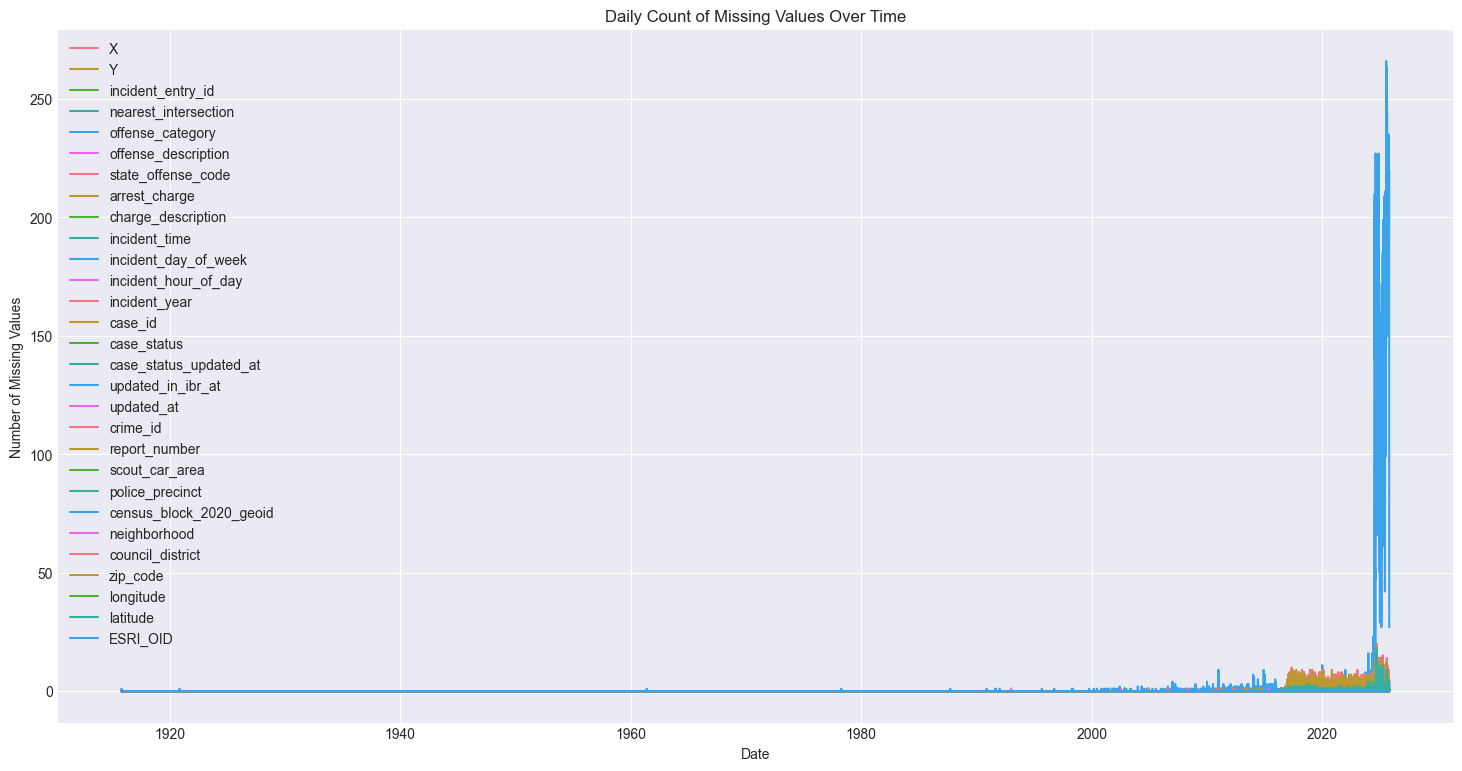

In [39]:
daily_missing_values = crime_incidents.isnull().resample('D').sum()

plt.figure(figsize=(18, 9))
for column in daily_missing_values.columns:
    plt.plot(daily_missing_values.index, daily_missing_values[column], label=column)

plt.title('Daily Count of Missing Values Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.legend()
plt.grid(True)
plt.show()

## PART 2: Data Cleaning & Feature Engineering

##### This phase centered on transforming raw, granular incident reports into a structured dataset optimized for time-series forecasting. The primary objective was to convert unstructured logs into model-ready features.
##### Engineered to handle real-world data inconsistencies, using strategic imputation for missing geospatial coordinates and filtering invalid records to ensure statistical reliability. A core component of this phase was Temporal Feature Extraction; parsing raw timestamps to derive critical cyclical features—including seasonality, day-of-week, and weekend indicators—essential for capturing crime trends.
##### Furthermore, performed Multi-Level Aggregation, resampling data across various temporal resolutions (hourly, daily, monthly) and spatial hierarchies (police districts).

##### dropping unnecessary columns

In [40]:
crime_incidents_ = crime_incidents.drop(columns=['X', 'Y', 'updated_in_ibr_at', 'updated_at', 'report_number', 'ESRI_OID'])
crime_incidents_.head()

crime_incidents_.columns

Index(['incident_entry_id', 'nearest_intersection', 'offense_category',
       'offense_description', 'state_offense_code', 'arrest_charge',
       'charge_description', 'incident_time', 'incident_day_of_week',
       'incident_hour_of_day', 'incident_year', 'case_id', 'case_status',
       'case_status_updated_at', 'crime_id', 'scout_car_area',
       'police_precinct', 'census_block_2020_geoid', 'neighborhood',
       'council_district', 'zip_code', 'longitude', 'latitude'],
      dtype='object')

##### check for null values.

In [41]:
display(pd.isnull(crime_incidents_).sum())

incident_entry_id             0
nearest_intersection        956
offense_category              0
offense_description           0
state_offense_code            0
arrest_charge                 0
charge_description            0
incident_time                 0
incident_day_of_week          0
incident_hour_of_day          0
incident_year                 0
case_id                       0
case_status                   0
case_status_updated_at        7
crime_id                      0
scout_car_area                0
police_precinct               0
census_block_2020_geoid    2962
neighborhood               6583
council_district           7664
zip_code                   6670
longitude                   956
latitude                    956
dtype: int64

### For liquor dataset

In [42]:
liquor_licenses = pd.read_csv('data/liquor-licenses.csv')
liquor_licenses

,Account Name,Doing Business As,Street Address,License Type,License Subtype,Statute,License Number,Status,Ownership Transferable,Location Transferable,ObjectId,License Type Group,Business ID,Zip Code,Address ID,Latitude,Longitude,x,y
0,"ALPINO RESTAURANT OPERATIONS, LLC",ALPINO,1426 Bagley St,Class C,Regular,NaN,NaN,Active,Yes,Yes,1,NaN,NaN,48216.0,347484.0,42.329943,-83.065086,-9.246763e+06,5.210532e+06
1,INDIAN VILLAGE TENNIS CLUB,INDIAN VILLAGE TENNIS CLUB,1502 Parker St,Club,NaN,NaN,NaN,Active,N,Y,2,NaN,NaN,48214.0,244279.0,42.356808,-82.996407,-9.239118e+06,5.214578e+06
2,"FAMILY DOLLAR STORES OF MICHIGAN, LLC (A VIRGI...",FAMILY DOLLAR #28708,14318 Gratiot Ave,Specially Designated Merchant,NaN,NaN,NaN,Active,Y,Y,3,NaN,NaN,48205.0,97673.0,42.435540,-82.976409,-9.236892e+06,5.226446e+06
3,EL VALLARTA LIVE LLC,EL VALLARTA,4381 Larkins St,Specially Designated Merchant,NaN,MCL 436.1533(5)(a),NaN,Escrow,Yes,No,4,NaN,NaN,48210.0,215289.0,42.330204,-83.130386,-9.254032e+06,5.210571e+06
4,JMORAD INC,VERNOR EXPRESS LIQUOR STORE,3855 W Vernor Hwy,Specially Designated Merchant,NaN,NaN,NaN,Active,Yes,Yes,5,NaN,NaN,48216.0,219246.0,42.322266,-83.090250,-9.249564e+06,5.209376e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,"DHD LIQUOR, INC.",COGNAC CASTLE,15415 Harper Ave,Specially Designated Merchant,NaN,NaN,NaN,Active,Y,Y,1990,NaN,NaN,48224.0,298409.0,42.407586,-82.955187,-9.234529e+06,5.222231e+06
1990,"ATHENIAN FOOD COMPANY, INC.",NIKKI'S PIZZA,735 Beaubien St,Specially Designated Merchant,NaN,NaN,NaN,Active,Y,Y,1991,NaN,NaN,48226.0,547267.0,42.333723,-83.042046,-9.244198e+06,5.211101e+06
1991,"NNDS, LLC",NaN,12535 Mack Ave,Specially Designated Merchant,NaN,NaN,NaN,Active,Yes,Yes,1992,NaN,NaN,48215.0,350979.0,42.384438,-82.967360,-9.235884e+06,5.218741e+06
1992,"BOA HOSPITALITY, LLC",BOA FUSION STEAKHOUSE,607 Shelby St,Class C,RDA,MCL 436.1521A(1)A,NaN,Active,Yes,No,1993,NaN,NaN,48226.0,28382.0,42.329286,-83.048391,-9.244905e+06,5.210433e+06


##### check for percentage of null values per column

In [43]:
total_rows = len(liquor_licenses)
percentage_missing_values = (liquor_licenses.isnull().sum() / total_rows) * 100

print("Percentage of Null Values per Column:")
print(percentage_missing_values)

Percentage of Null Values per Column:
Account Name                0.000000
Doing Business As          20.712136
Street Address              0.000000
License Type                0.000000
License Subtype            49.548646
Statute                    88.615848
License Number            100.000000
Status                      0.000000
Ownership Transferable      3.009027
Location Transferable       3.009027
ObjectId                    0.000000
License Type Group        100.000000
Business ID               100.000000
Zip Code                    8.726179
Address ID                  7.622869
Latitude                    0.852558
Longitude                   0.852558
x                           0.852558
y                           0.852558
dtype: float64


In [44]:
liquor_licenses.shape[0]

1994

##### drip duplicates out of datasets

In [45]:
liquor_licenses_ = liquor_licenses.drop_duplicates()
liquor_licenses_.shape[0]

1994

##### drop unnecessary columns

In [46]:
liquor_licenses_ = (
    liquor_licenses_
    .drop(columns=[
        'Account Name',
        'Doing Business As',
        'License Subtype',
        'Statute',
        'License Number',
        'Ownership Transferable',
        'Location Transferable',
        'ObjectId',
        'License Type Group',
        'Business ID',
        'Address ID',
        'x',
        'y'
    ])
)

In [47]:
liquor_licenses_.isnull().sum()

Street Address      0
License Type        0
Status              0
Zip Code          174
Latitude           17
Longitude          17
dtype: int64

## PART 3 - Temporal Pattern Analysis

##### Addressing the project's first primary research question, this phase focused on uncovering the when of criminal activity through rigorous Time Series Analysis. The objective was to decode complex temporal behaviors to aid in proactive resource planning.

##### Conducted a granular investigation of crime distributions across multiple time horizons—analyzing hourly, daily, and monthly variances. Moving beyond basic plotting, applied Statistical Time Series Decomposition to mathematically separate the data into three distinct components: underlying trends, seasonal cycles, and residual noise. This isolation allowed for the precise identification of peak risk windows and long-term shifts in crime rates.

In [48]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

##### pre-process the data

In [49]:
crime_incidents_['date'] = crime_incidents_.index.date
crime_incidents_['year'] = crime_incidents_.index.year
crime_incidents_['month'] = crime_incidents_.index.month
crime_incidents_['week'] = crime_incidents_.index.isocalendar().week
crime_incidents_['day_of_week'] = crime_incidents_.index.dayofweek
crime_incidents_['hour'] = crime_incidents_.index.hour

##### extract count of crimes in different time horizons

In [50]:
# Daily crime counts
daily_crimes = crime_incidents_.groupby('date').size().reset_index(name='crime_count')
daily_crimes['date'] = pd.to_datetime(daily_crimes['date'])
daily_crimes = daily_crimes.set_index('date').sort_index()

# Weekly crime counts
weekly_crimes = crime_incidents_.groupby(crime_incidents_.index.to_period('W')).size()
weekly_crimes.index = weekly_crimes.index.to_timestamp()
weekly_crimes = weekly_crimes.to_frame(name='crime_count')

# Monthly crime counts
monthly_crimes = crime_incidents_.groupby(crime_incidents_.index.to_period('M')).size()
monthly_crimes.index = monthly_crimes.index.to_timestamp()
monthly_crimes = monthly_crimes.to_frame(name='crime_count')

##### visuals of count of crimes in different time horizons

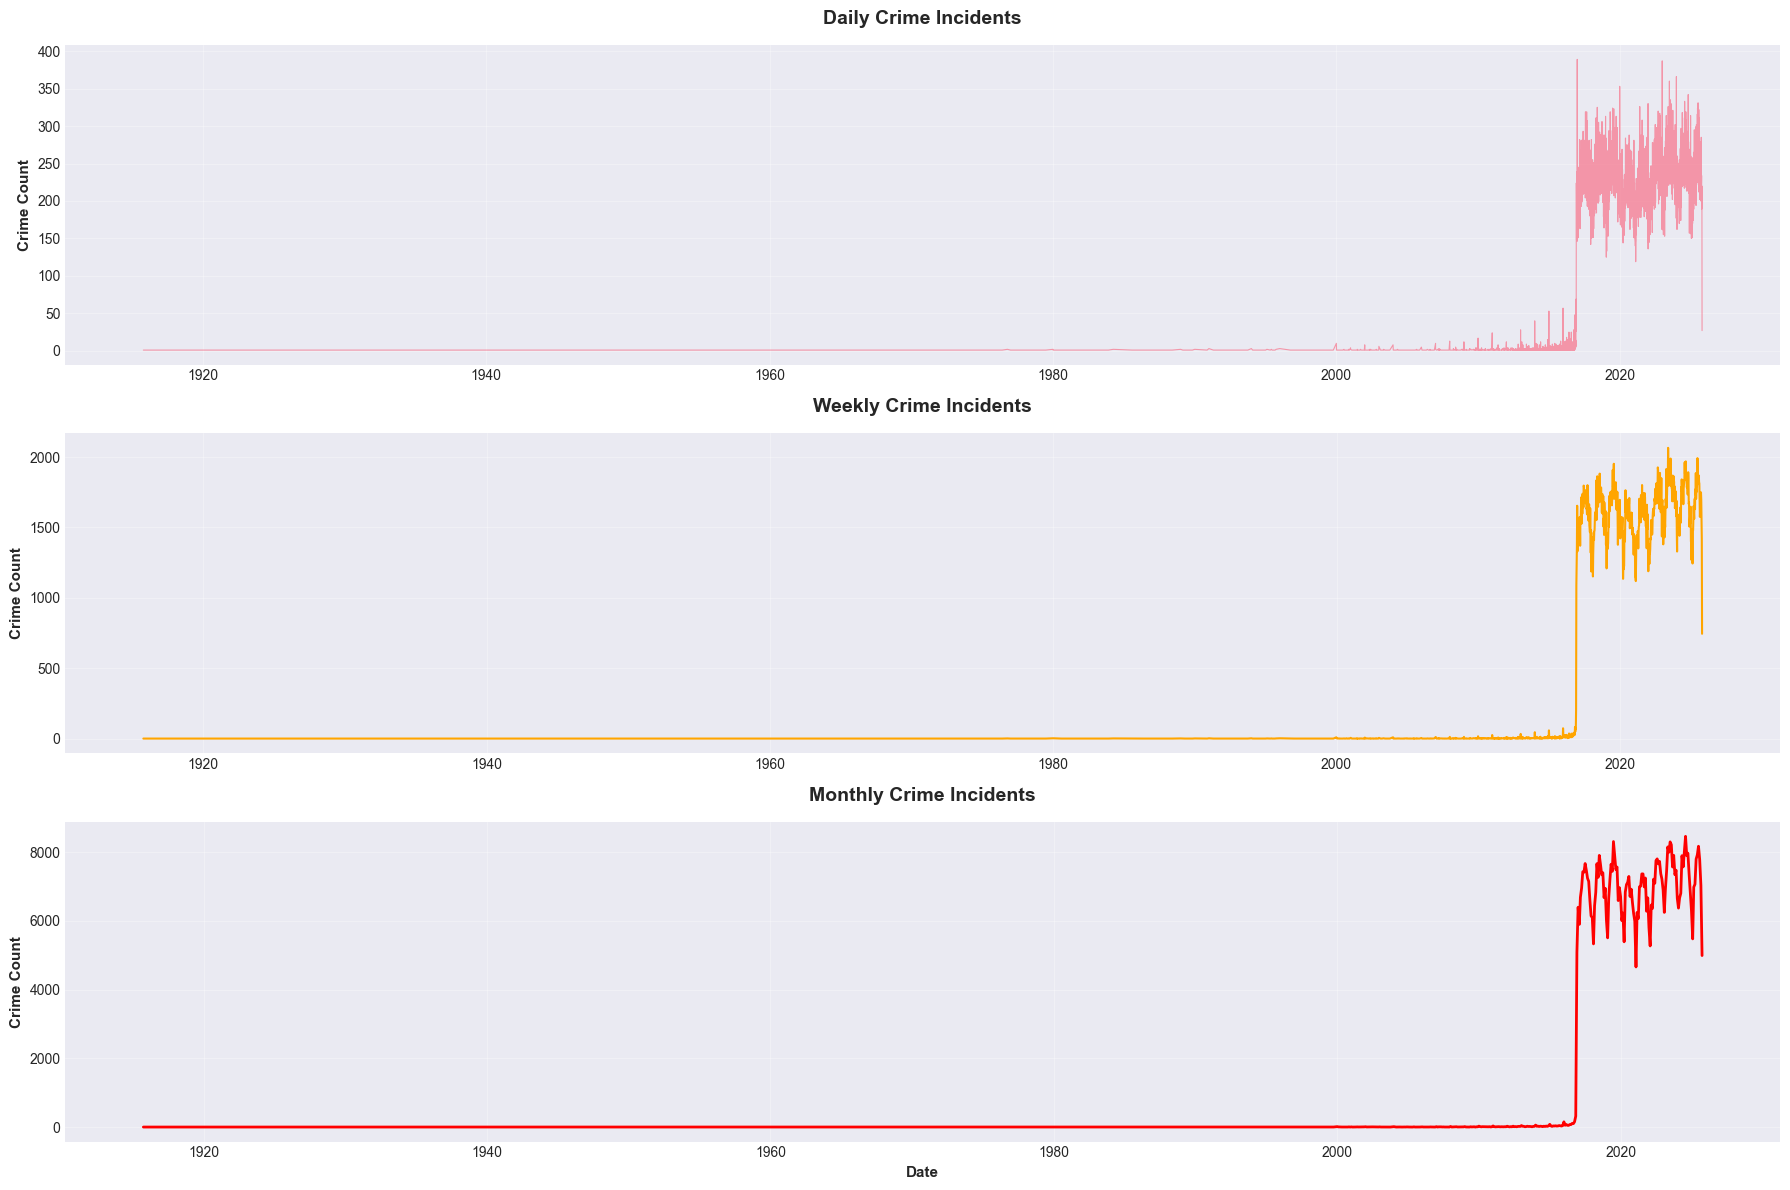

In [51]:
fig, axes = plt.subplots(3, 1, figsize=(18, 12))

# Daily crimes
axes[0].plot(daily_crimes.index, daily_crimes['crime_count'], linewidth=0.8, alpha=0.7)
axes[0].set_title('Daily Crime Incidents', fontsize=14, fontweight='bold', pad=15)
axes[0].set_ylabel('Crime Count', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Weekly crimes
axes[1].plot(weekly_crimes.index, weekly_crimes['crime_count'], linewidth=1.5, color='orange')
axes[1].set_title('Weekly Crime Incidents', fontsize=14, fontweight='bold', pad=15)
axes[1].set_ylabel('Crime Count', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Monthly crimes
axes[2].plot(monthly_crimes.index, monthly_crimes['crime_count'], linewidth=2, color='red')
axes[2].set_title('Monthly Crime Incidents', fontsize=14, fontweight='bold', pad=15)
axes[2].set_xlabel('Date', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Crime Count', fontsize=11, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Decomposition

#### 1. Additive decomposition on monthly counts

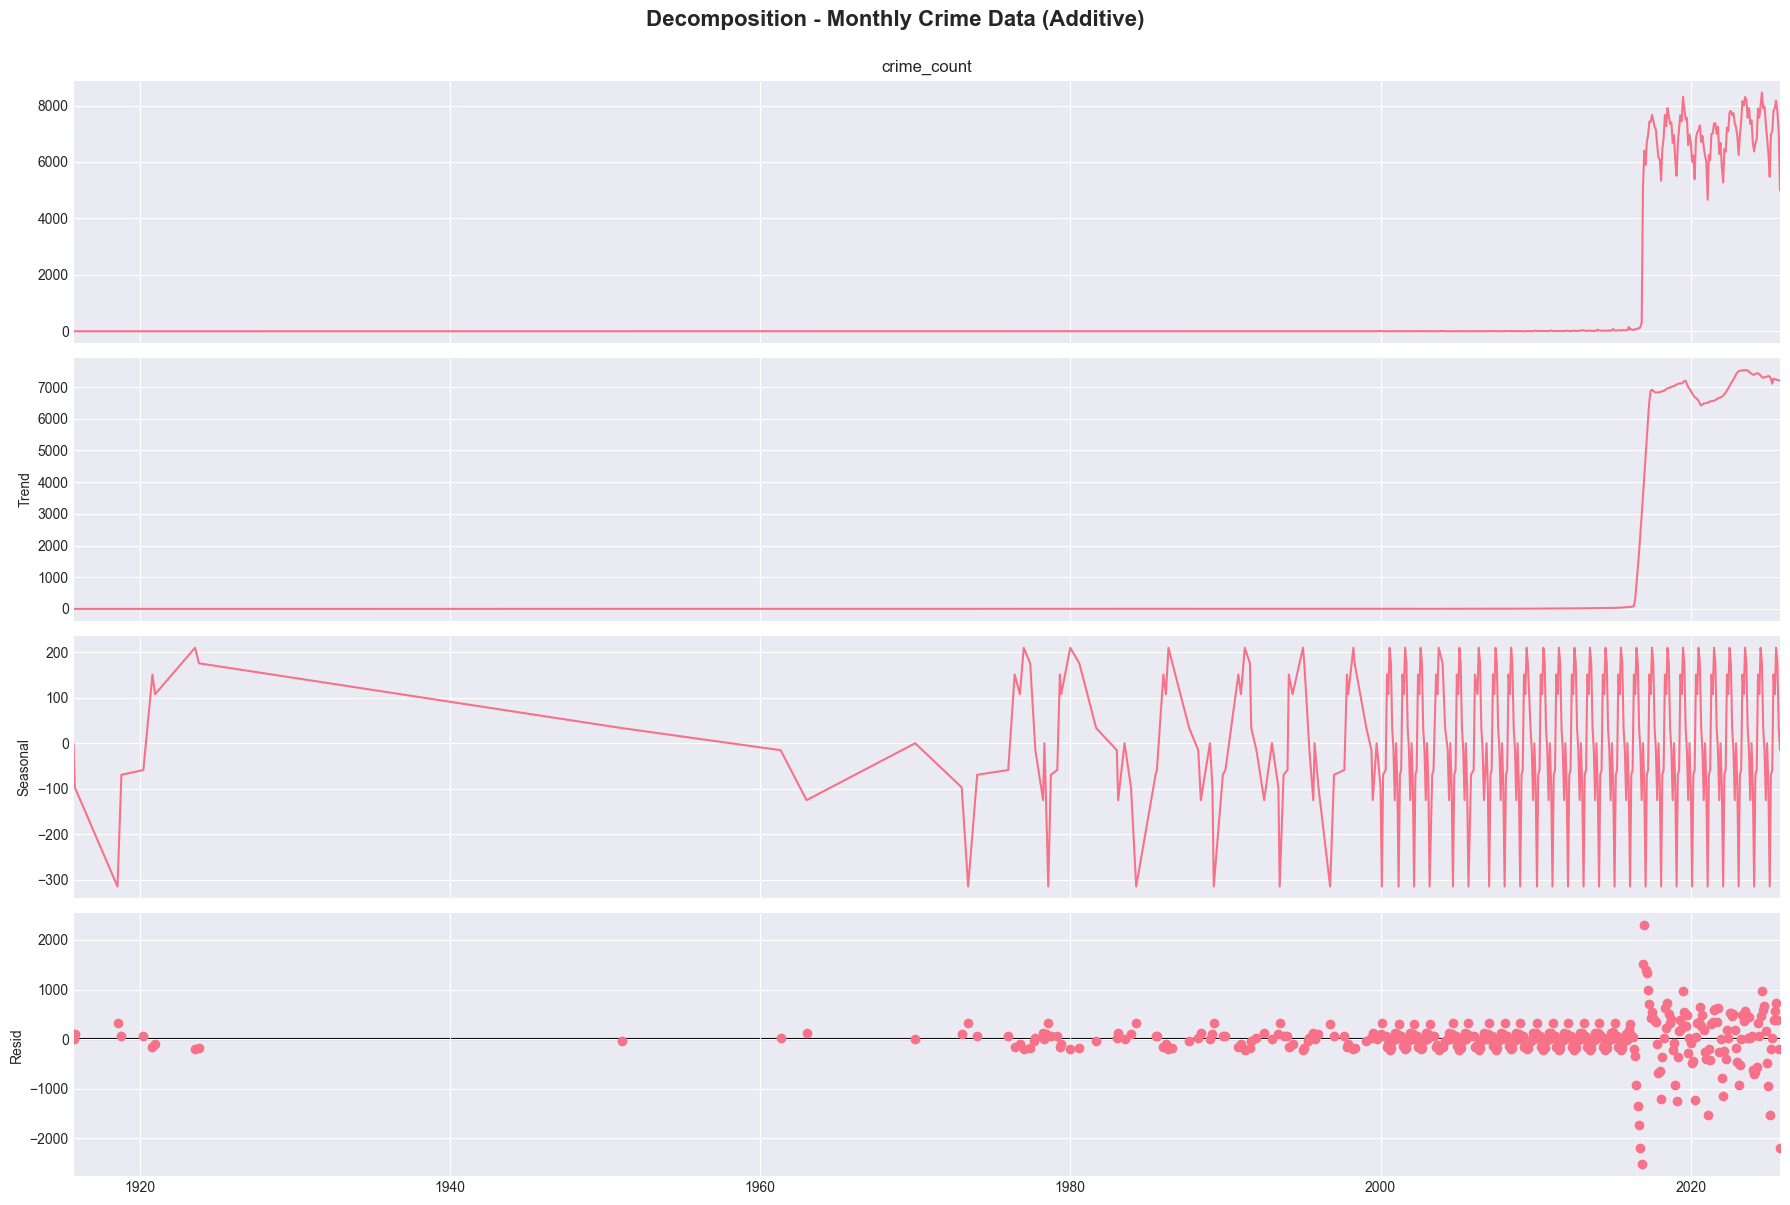

In [ ]:
# Perform decomposition (Additive)
decomposition_monthly_additive = seasonal_decompose(
    monthly_crimes['crime_count'], 
    model='additive',
    period=12,  # 12 months = 1 year seasonality
    extrapolate_trend='freq'
)

trend_monthly = decomposition_monthly_additive.trend
seasonal_monthly = decomposition_monthly_additive.seasonal
residual_monthly = decomposition_monthly_additive.resid

fig = decomposition_monthly_additive.plot()
fig.set_size_inches(18, 12)
fig.suptitle('Decomposition - Monthly Crime Data (Additive)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

#### 2. Multiplicative seasonal decomposition on monthly counts

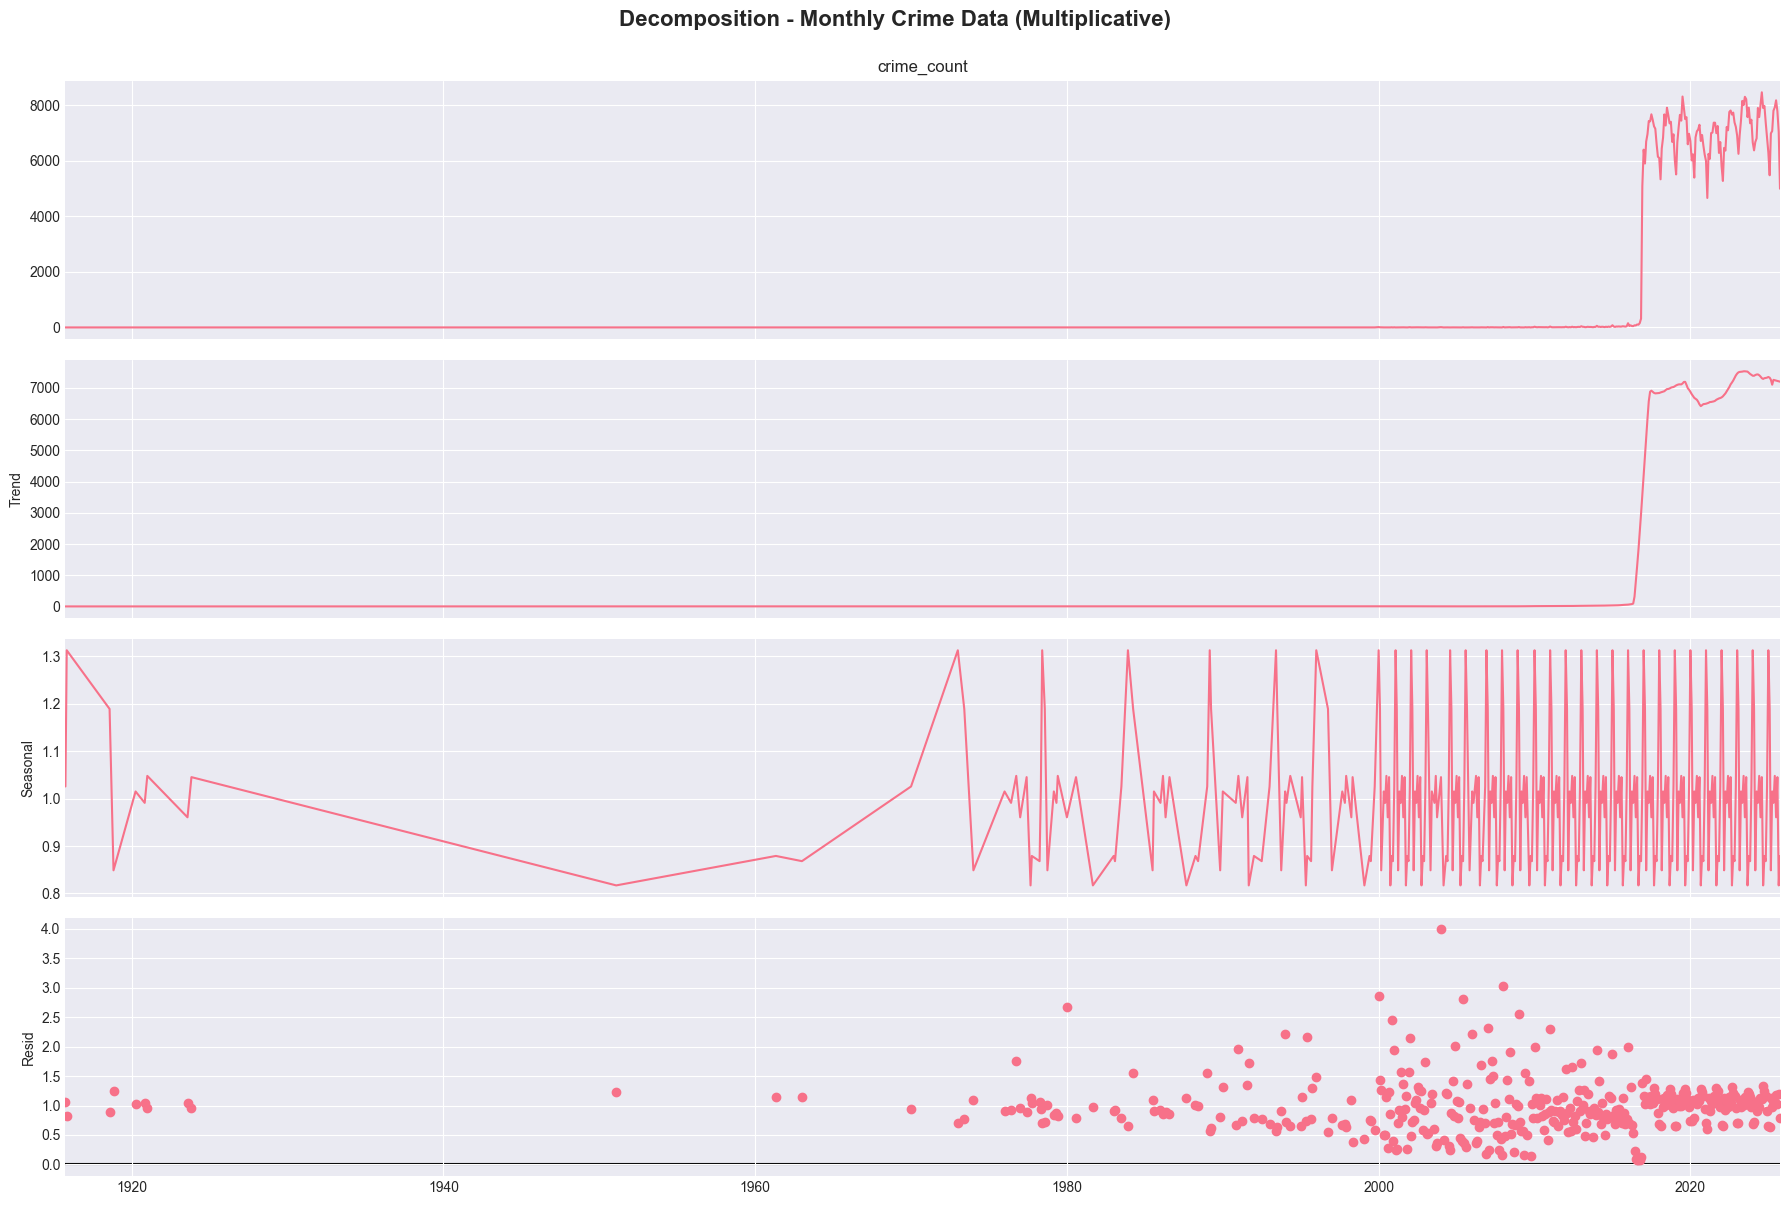

In [ ]:
# Perform decomposition (multiplicative)
decomposition_monthly_multiplicative = seasonal_decompose(
    monthly_crimes['crime_count'], 
    model='multiplicative',
    period=12,
    extrapolate_trend='freq'
)

fig = decomposition_monthly_multiplicative.plot()
fig.set_size_inches(18, 12)
fig.suptitle('Decomposition - Monthly Crime Data (Multiplicative)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

#### 3. Weekly Additive Decomposition on weekly counts

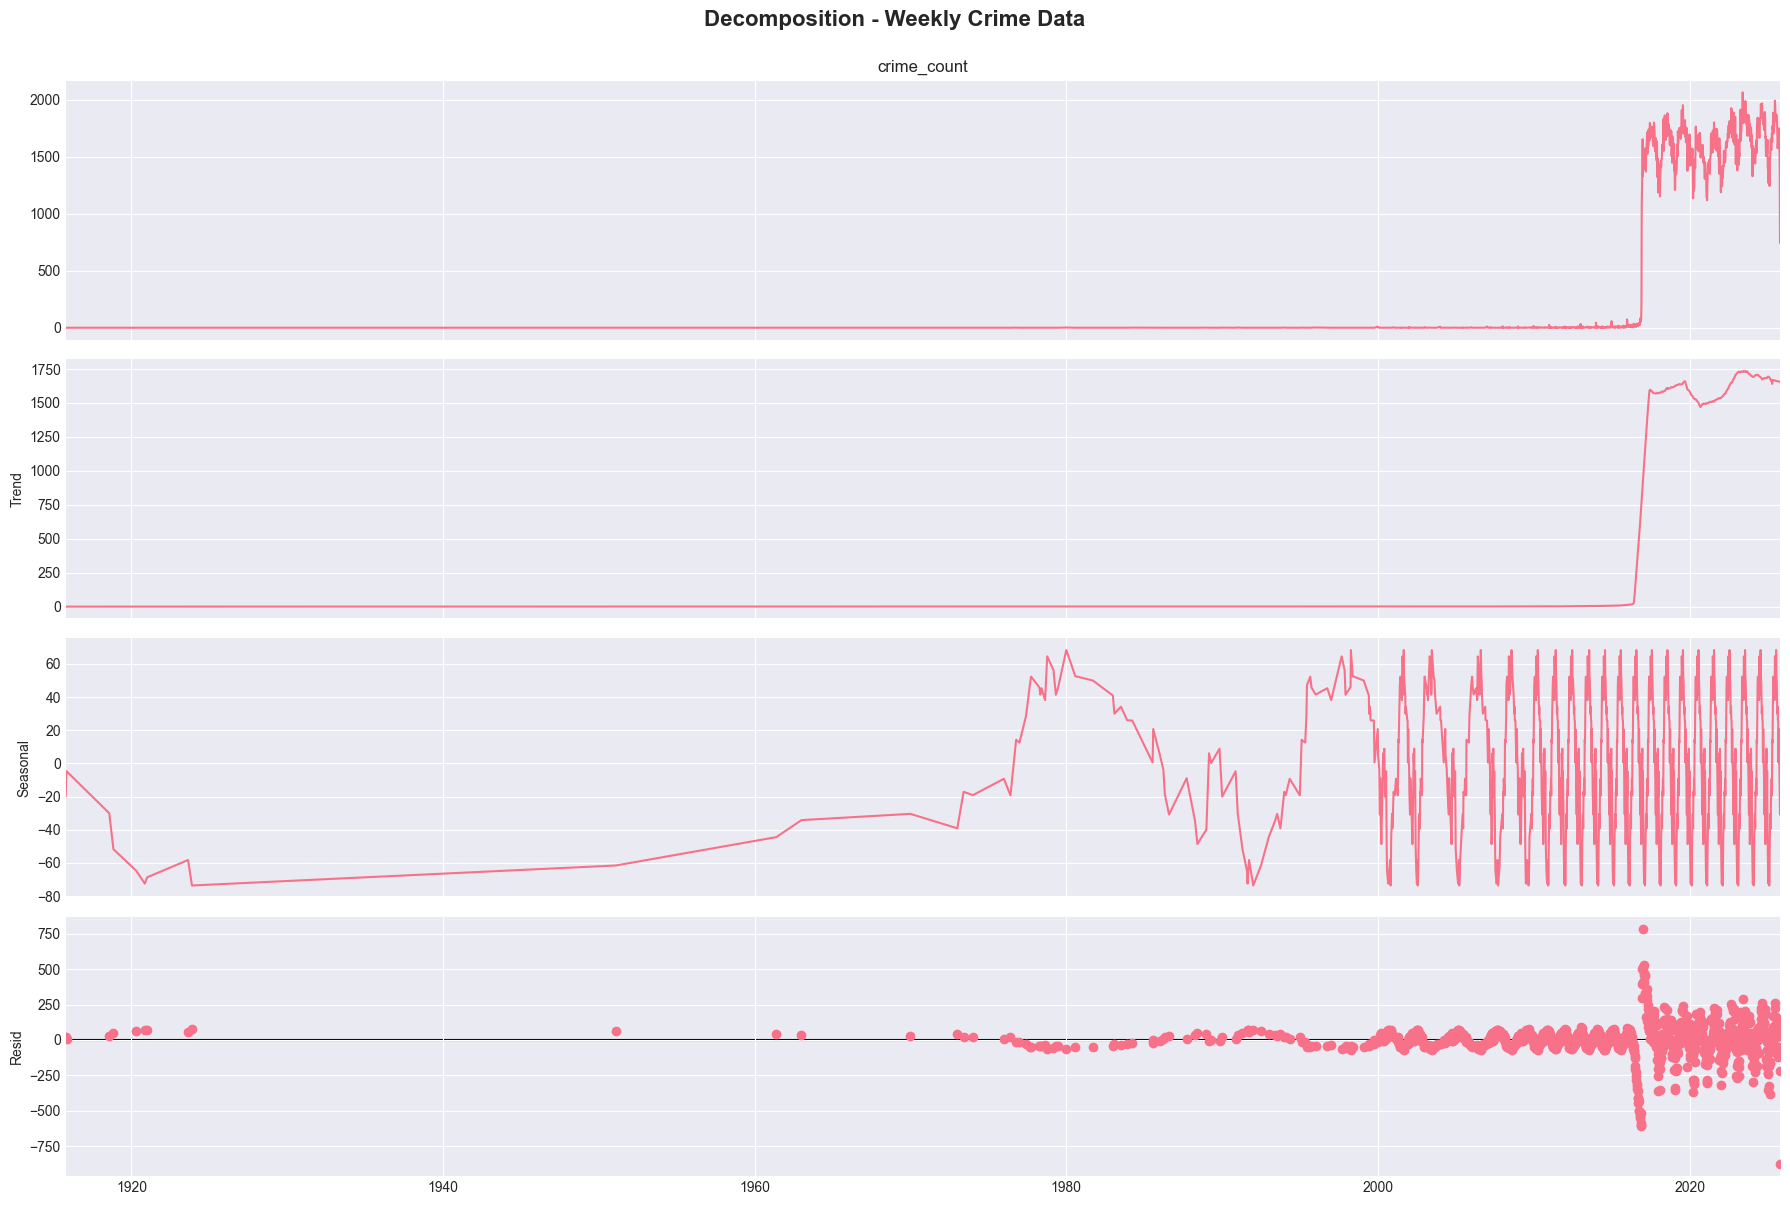

In [62]:
# Weekly decomposition (52 weeks = 1 year seasonality)
decomposition_weekly = seasonal_decompose(
    weekly_crimes['crime_count'], 
    model='additive',
    period=52,  # 52 weeks per year
    extrapolate_trend='freq'
)

fig = decomposition_weekly.plot()
fig.set_size_inches(18, 12)
fig.suptitle('Decomposition - Weekly Crime Data', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

#### Visualize the trend of the monthly crimes (adding Linear Regression as trend line)

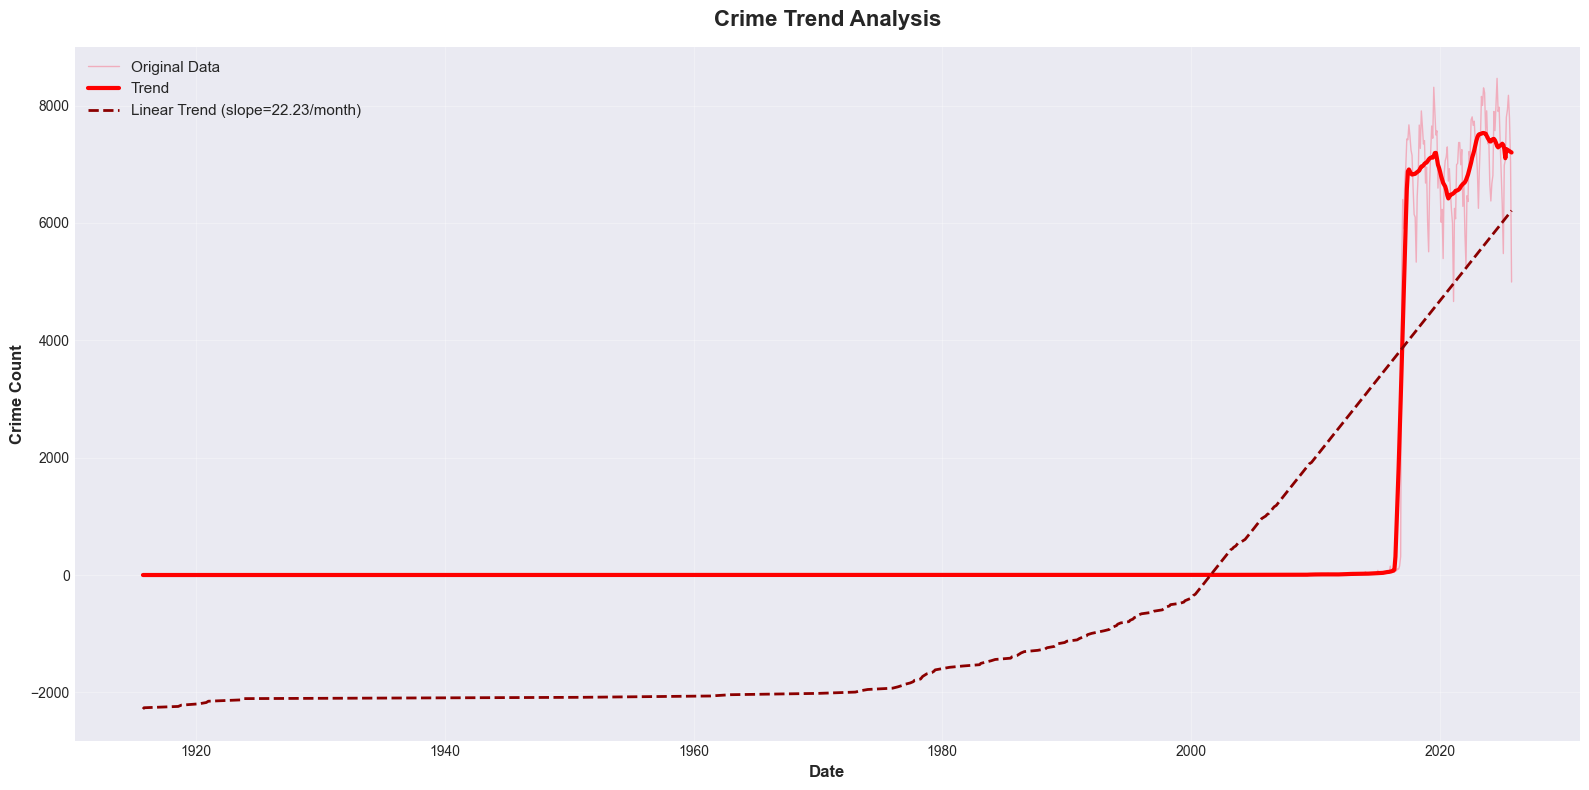

In [64]:
# Calculate trend statistics
trend_values = trend_monthly.dropna()
trend_change = trend_values.iloc[-1] - trend_values.iloc[0]
trend_pct_change = (trend_change / trend_values.iloc[0]) * 100

# Visualize trend with confidence interval
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(monthly_crimes.index, monthly_crimes['crime_count'], 
        label='Original Data', alpha=0.5, linewidth=1)
ax.plot(trend_monthly.index, trend_monthly, 
        label='Trend', linewidth=3, color='red')

# Add trend line (linear regression)
from scipy import stats
x_numeric = np.arange(len(trend_values))
slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, trend_values)
trend_line = slope * x_numeric + intercept

ax.plot(trend_values.index, trend_line, 
        label=f'Linear Trend (slope={slope:.2f}/month)', 
        linestyle='--', linewidth=2, color='darkred')

ax.set_title('Crime Trend Analysis', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Crime Count', fontsize=12, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Seasonal pattern decoding which month is affected.

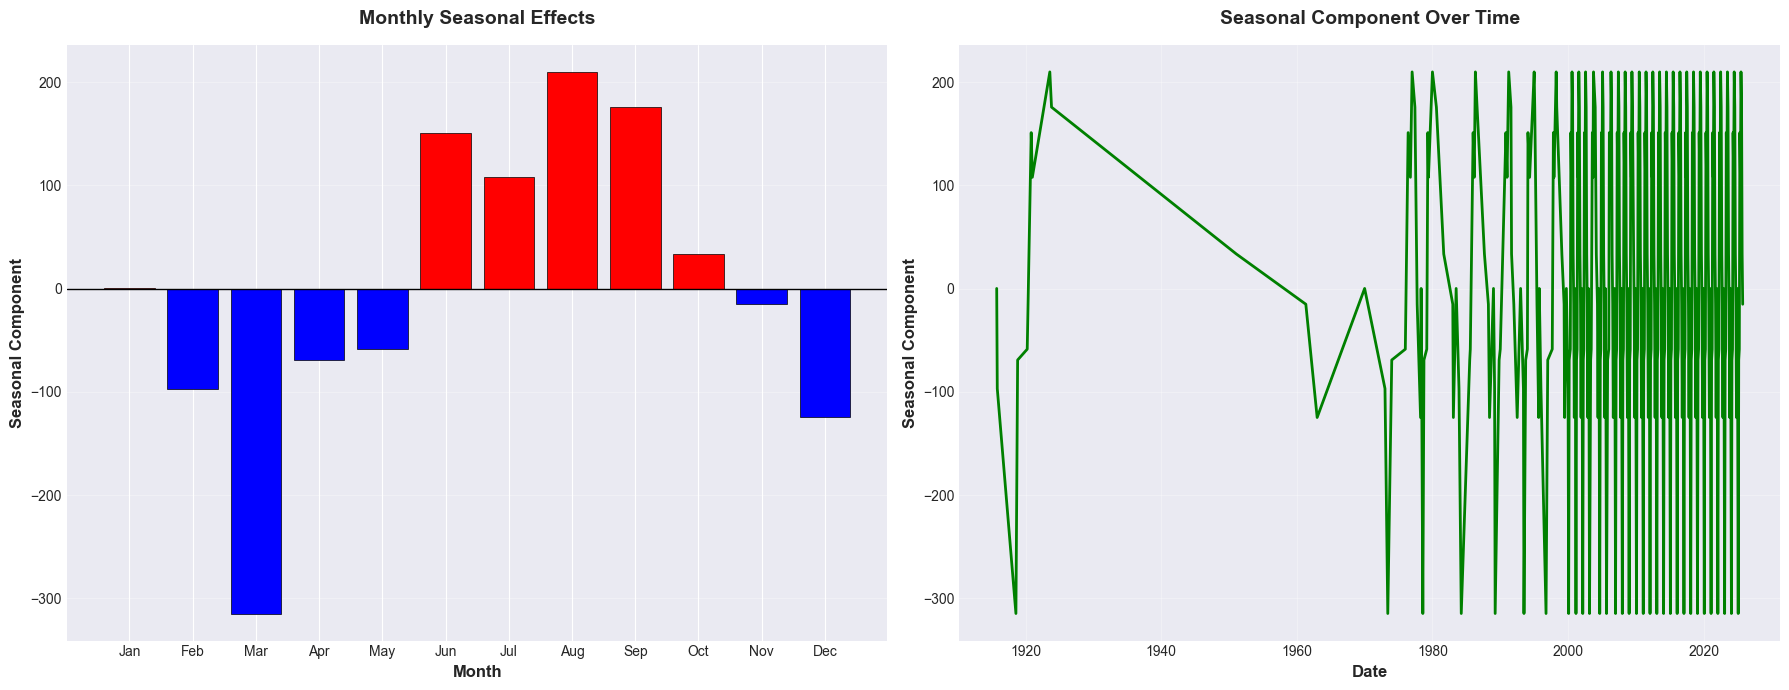

Monthly Seasonal Effects:
Month  Seasonal_Effect
  Jan         0.240841
  Feb       -96.780315
  Mar      -314.680378
  Apr       -69.067420
  May       -58.571650
  Jun       151.217710
  Jul       107.928460
  Aug       210.030742
  Sep       175.906461
  Oct        33.605097
  Nov       -15.050434
  Dec      -124.779114

Peak Crime Month: Aug (+210.03)
Low Crime Month: Mar (-314.68)


In [ ]:
# Extract unique seasonal pattern (12 months)
seasonal_pattern = seasonal_monthly[:12].values

# Create seasonal index
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

seasonal_df = pd.DataFrame({
    'Month': months,
    'Seasonal_Effect': seasonal_pattern
})

# Find peak and low crime months
peak_month = seasonal_df.loc[seasonal_df['Seasonal_Effect'].idxmax()]
low_month = seasonal_df.loc[seasonal_df['Seasonal_Effect'].idxmin()]

# Visualize seasonality
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Bar chart
ax1.bar(seasonal_df['Month'], seasonal_df['Seasonal_Effect'], 
        color=['red' if x > 0 else 'blue' for x in seasonal_df['Seasonal_Effect']],
        edgecolor='black', linewidth=0.5)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.set_title('Monthly Seasonal Effects', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Seasonal Component', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Line chart - full seasonal component over time
ax2.plot(seasonal_monthly.index, seasonal_monthly, linewidth=2, color='green')
ax2.set_title('Seasonal Component Over Time', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
ax2.set_ylabel('Seasonal Component', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Monthly Seasonal Effects:")
print(seasonal_df.to_string(index=False))

print(f"\nPeak Crime Month: {peak_month['Month']} ({peak_month['Seasonal_Effect']:+.2f})")
print(f"Low Crime Month: {low_month['Month']} ({low_month['Seasonal_Effect']:+.2f})")

#### Visualizing Residuals

Residual Statistics:
  - Mean: -3.90
  - Std Dev: 431.20
  - Min: -2524.39
  - Max: 2292.70

Shapiro-Wilk Normality Test:
  - Statistic: 0.8036
  - P-value: 0.000000
  - Residuals are NOT normally distributed


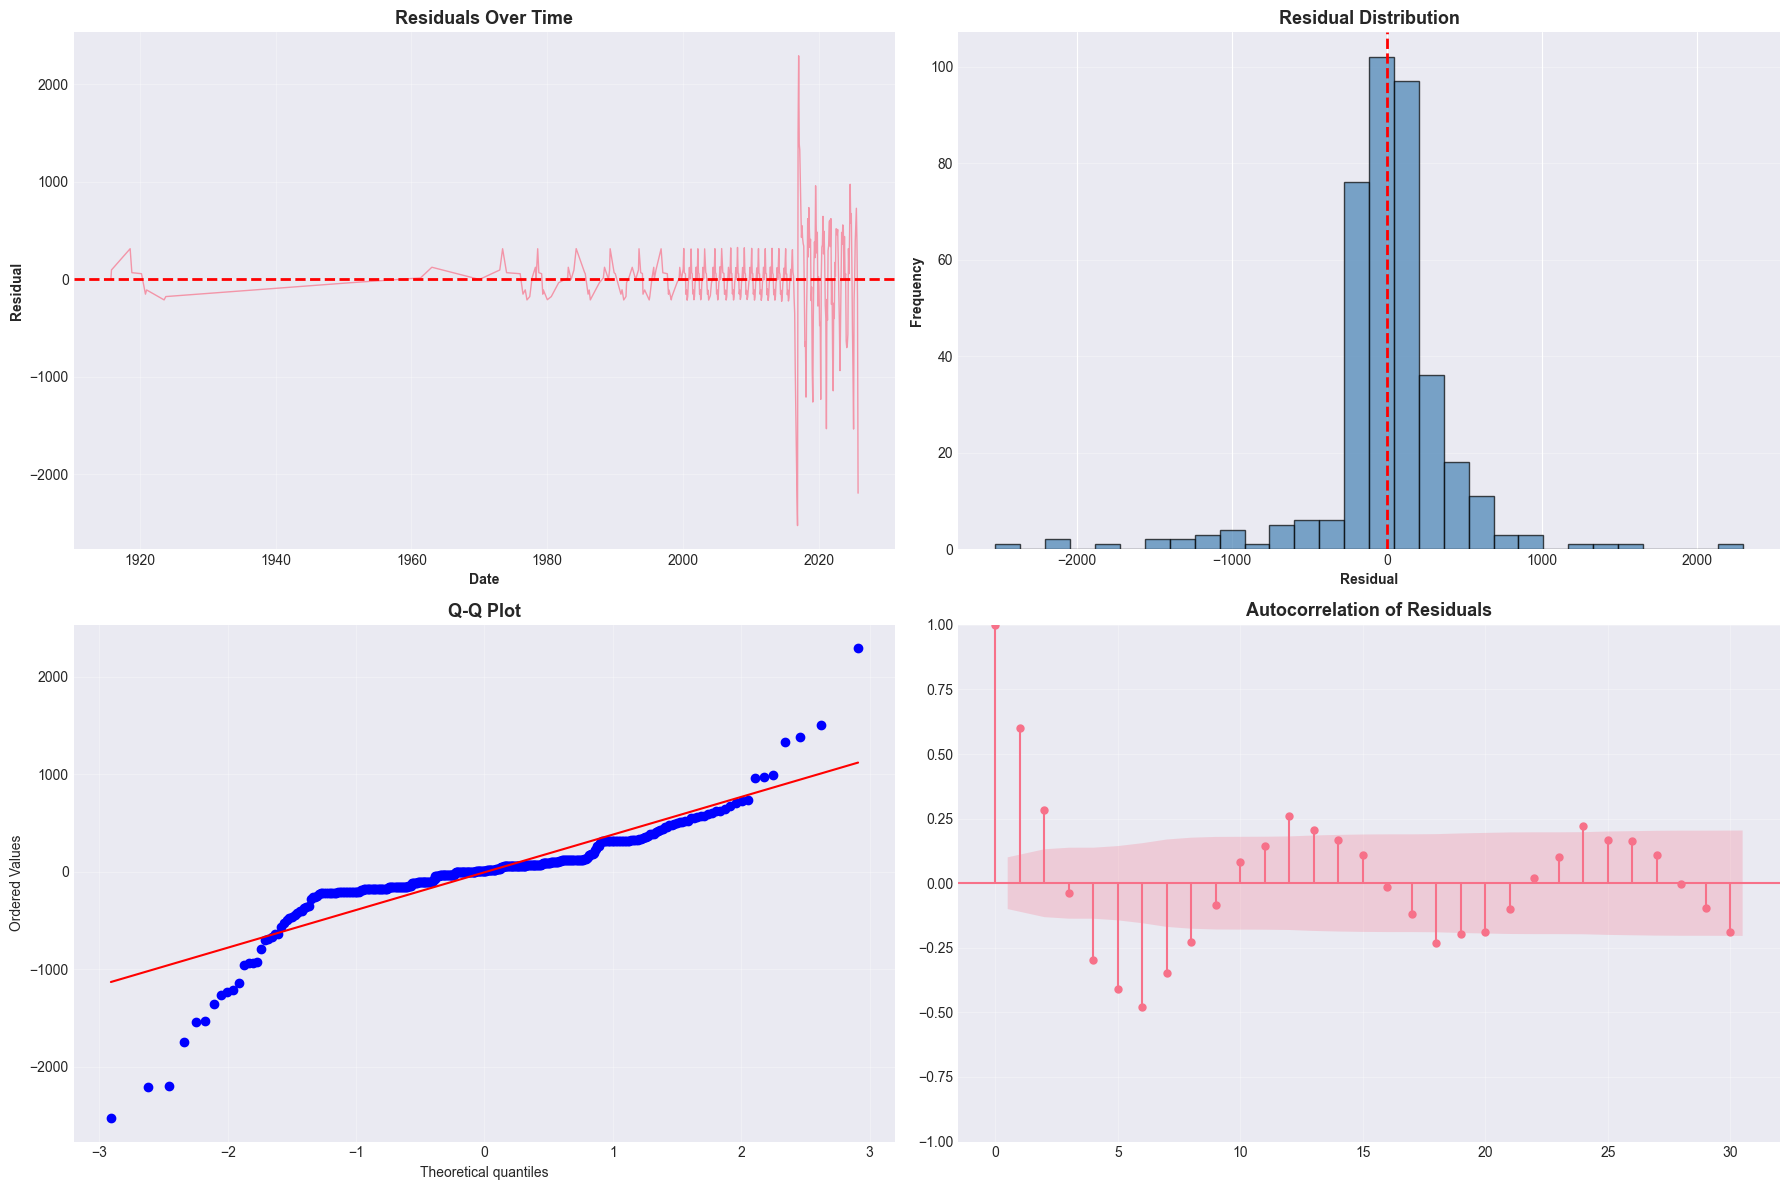

In [ ]:
residuals = residual_monthly.dropna()

# Test for normality (Shapiro-Wilk test)
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"\nShapiro-Wilk Normality Test:")
print(f"  - Statistic: {stat:.4f}")
print(f"  - P-value: {p_value:.6f}")
print(f"  - Residuals are {'normally distributed' if p_value > 0.05 else 'NOT normally distributed'}")

# Visualize residuals
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Time series plot
axes[0, 0].plot(residuals.index, residuals, linewidth=1, alpha=0.7)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_title('Residuals Over Time', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Date', fontweight='bold')
axes[0, 0].set_ylabel('Residual', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Histogram
axes[0, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Residual Distribution', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Residual', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# ACF plot of residuals
plot_acf(residuals, lags=30, ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('Autocorrelation of Residuals', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()